# Unsupervised Learning
- Finds patterns in data 
    - clustering customers but their purchases
    - cpmpressing the data using purchase patterns using dimension reduction
- Unsupervised learning finds patterns in data, but without a specific prediction task in mind


# Ch. 1 Clustering for Dataset Exploration
## k-means clustering
- finds clusters of samples
- number of clusters must be specified
- implemented in sklearn
- k-means remembers the mean of each cluster (the "centroids")
- Finds the nearest centroid to each new sample given to the model

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.predict(X)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


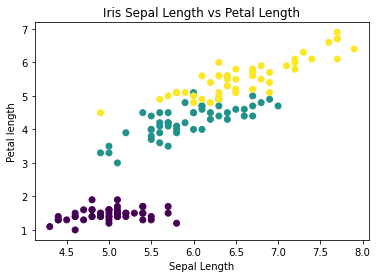

In [4]:
import matplotlib.pyplot as plt
xs = X[:,0] # Sepal Length
ys = X[:,2] # Petal Length
plt.scatter(xs, ys, c=y)
plt.ylabel('Petal length')
plt.xlabel('Sepal Length')
plt.title('Iris Sepal Length vs Petal Length')
plt.show()

## Evaluating a clustering
#### Cross Tabulation with pandas
- clusters vs species is a cross tabulation

In [5]:
import pandas as pd

### Measuring clustering quality
- Using only samples and their cluster labels 
- a good clustering has tight clusters
- Samples in each cluster are bunched together

Inertia measures clustering quality
- measures how spread out the clusters are (lower is better)
- distance from each sample to centroid of its cluster
- after fitting a KMeans model, available as attribute intertia_
- KMeans automatically attempts to minimize the inertia when choosing clusters

In [6]:
model.inertia_

78.851441426146

In [7]:
inertia_vals = []
clusters = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertia_vals.append(model.inertia_)
    clusters.append(i)

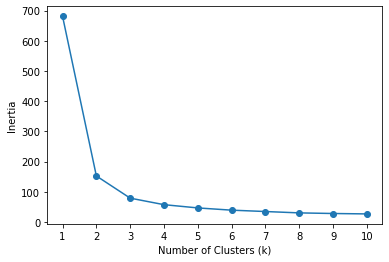

In [8]:
plt.plot(clusters, inertia_vals,'-o')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters (k)')
plt.xticks(clusters)
plt.show();

Choosing the number of clusters is a trade off between low inertia and low number of clusters. Generally, you want to choose where you see an "elbow" such as at the 3 mark above

## Transforming features for better clustering


In [9]:
wine = pd.read_csv('wine_data.txt')
X = wine.drop(['class_label', 'class_name'], axis=1)
y = wine.class_label

# Instantiate a KMeans Model
km = KMeans(n_clusters=3)

# Predict based on sample data
labels = km.fit_predict(X)

# Check model with crosstab
df = pd.DataFrame({'labels':labels, 'varieties':wine.class_name})

ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0      46           1
1               19       0          50
2               29      13          20


The above model did not do very well at clustering. This is because the features have high variance within themselves.

#### StandardScaler
- in KMeans: feature variance = feature influence
- data needs to be transformed so the features have equal variance
- StandardScaler transforms each feature to have a mean of 0 and variance of 1

In [10]:
# Assign data to variables
X = wine.drop(['class_label', 'class_name'], axis=1)
y = wine.class_label

# Import necessary packages
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Instantiate objects and pipeline
scaler = StandardScaler()
km = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, km)

# Fit the model and predict based on samples
pipeline.fit(X)

labels = pipeline.predict(X)

# Check model with crosstab
df = pd.DataFrame({'labels':labels, 'varieties':wine.class_name})

ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0      59           3
1               48       0           3
2                0       0          65


# Ch. 2 Visualizing Hierarchies
- t-SNE and Hierarchical clustering can be used for visualizing for unsupervised learning
- t-SNE creates a 2D map of a dataset
- hierarchical clustering: arranges samples into a hierarchy of clusters

### Hierarchical Clustering
Agglomerative Clustering
- Every sample begins in its own cluster
- at each step, the two closest clusters are merged
- this is repeated until all samples are in a singular set

Divisive Clustering works the other way around

#### Using SciPy for hierarchical Clustering

In [11]:
samples = [[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]]

varieties = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

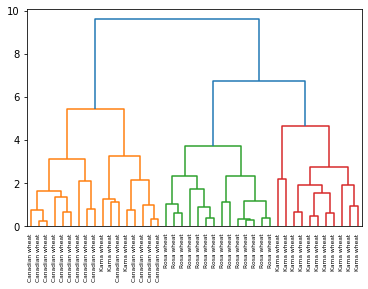

In [12]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)

plt.show()

### Cluster Labels in Hierarchical Clustering
- not only a visualization tool
- Cluster labels at any intermediate stages can be recovered for use in further things (i.e cross tabulation)
- The y-axis labels signify the distance between clusters when they were merged.
- The distance between clusters is defined by a linkage method
- above, we used complete, meaning the two furthest points in two samples were used to measure the distance
- This is specified using the "method" parameter

fcluster() can be used to extract the cluster labels at any given intermediate

In [13]:
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')

from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 6, criterion='distance')

print(labels)

[3 3 3 3 3 1 3 3 1 3 3 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [14]:
# Alight the cluster labels with variety labels
import pandas as pd
pairs = pd.DataFrame({'labels':labels,'varieties':varieties})

# print a crosstabulation
ct = pd.crosstab(pairs['labels'], pairs['varieties'])
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


### t-SNE for 2D maps
- t-SNE = 't-distributed stochastic neighbor embedding"
- t-SNE maps samples from a high dimensional space into 2D or maybe 3D so it can be easily visualized
- map approximately preserves the nearness of samples
- great for inspecting datasets
- t-SNE only has fit_transform() and does not have individual fit() and transform()
- You cannot extend a t-SNE map to include new samples, you MUST instead start over
- Learning Rate can vary depending on dataset. Try a few values between 50 and 200. A bad learning rate will have points bunched closely together

Iris dataset has 4 dimensions (4 features)
- 

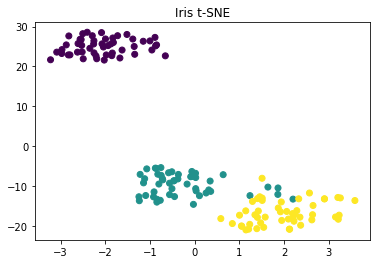

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Import necessary packages
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Instantiate a model
model = TSNE(learning_rate=100)

# Apply fit-transform to samples
transformed = model.fit_transform(X)

xs = transformed[:,0]
ys = transformed[:,1]

# Plot the result
plt.scatter(xs, ys, c=y)
plt.title('Iris t-SNE')
plt.show()

The t-SNE plot will not be the same everytime you run it. However, the relative positioning between the clusters will be the same, even if the orientation of the plot is not

# Ch. 3 Decorrelating Data and Dimension Reduction
## Dimension Reduction
- finds patterns in data and re-expresses it in a condensed form
- this makes subsequent computation with data much more efficient
- this also removes noise from the data set to improve model building

## Principal Component Analysis (PCA)
- first, decorrelates the data
    - rotates data samples to be aligned with the axes
    - shifts samples to have a mean of zero
- second, the dimensions are reduced


- PCA is a scikit-learn component just like KMeans or StandardScaler
    - fit() learns how to rotate and transform from the data
    - transform() applies the learned transformation to the dataset. this can be applied to new and unseen samples


- PCA Features
    - rows of transformed correspond to samples
    - columns of transformed are the "PCA Features"
    - row gives PCA feature values of corresponding sample
    - PCA Features are not correlated

In [16]:
# Assign data to variables
X = wine.drop(['class_label', 'class_name'], axis=1)
y = wine.class_label

# Imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Instantiate the PCA Object
model = PCA()

# Fit to the data
model.fit(Xs)

# Transform the data
transformed = model.transform(Xs)

print(model.components_[0])

[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
  0.28675223]


### Intrinsic Dimension
- intrinsic dimension: # of features needed to approximate the dataset
- essential idea behind dimension reduction
- What is the most compact representation of the samples?
- PCA can help detect this

#### PCA Identifies intrinsic dimension
- scatter plots only work with 2 or three features
- PCA indentifies instrinsic dimension when samples have any number of features
- intrinsic dimension = number of PCA features with significant variance

#### Intrinsic Dimension can be ambiguous
- intrinsic dimension is an idealization
- ...there is not always one correct answer

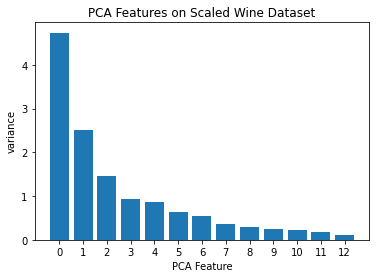

In [17]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA Feature')
plt.title('PCA Features on Scaled Wine Dataset')
plt.show()

### Dimension Reduction with PCA
- represents the same data but with less features
- important for machine learning pipelines
- PCA Features are in decreasing order of variance
- low variance features are assumed noise
- high variance features are assumed informative
- use n_components to tell the PCA how many features to keep (PCA(n_components=3))
- usually good to use the intrinsic dimension, if you know it

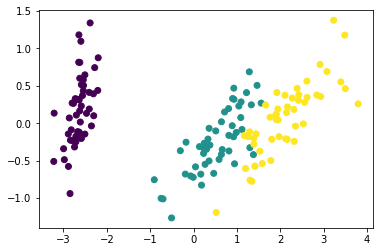

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Imports
from sklearn.decomposition import PCA

# Instantiate model
pca = PCA(n_components=2)

# Fit the model
pca.fit(X)
transformed = pca.transform(X)

# Plot the two features
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=y)
plt.show()

## Word Frequency Arrays
- Rows represent documents, columns represent words, values are the frequency of the word in the document
- because there are many words in one document, that may not be in another in the same array, many cell values end up being zeros

### Sparse Arrays and csr_matrix
- "Sparse": most entries are 0
- can use scipy.sparse.csr_matrix instead of a numpy array
- csr_matrix remembers only the non-zero entries. SAVES SPACE!
- Sklearn does not support csr_matrix
- Instead, we use sklearn's TruncatedSVD. This performs the same transformation as PCA, but it accepts csr_matrix as input
- TruncateSVD is programmed the same was as PCA from a user perspective

In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

In [19]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### Using sparse csr_matrix to cluster wikipedia pages

In [20]:
# wikipedia data taken from DataCamp. 60 rows (articles) and 13k+ columns (words)
wiki = pd.read_csv('wikipedia.csv') 
titles = wiki.titles # extract titles from first column
wiki = wiki.drop('titles', axis=1) # Drop Titles from data frame

# Create a csr_matrix object of the articles from wiki
from scipy.sparse import csr_matrix
articles = csr_matrix(wiki)

# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
39      0                                  Franck Ribéry
37      0                                       Football
36      0              2014 FIFA World Cup qualification
35      0                Colombia national football team
34      0                             Zlatan Ibrahimović
33      0                                 Radamel Falcao
32      0                                   Arsenal F.C.
31      0                              Cristiano Ronaldo
30      0                  France national football team
38      0                                         Neymar
18      1  2010 United Nations Climate Change Conference
17      1  Greenhouse gas emissions by the United States
16      1                                        350.org
15      1                                 Kyoto Protocol
19      1  2007 United Nations Climate Change Conference
13      1                               Connie Hedegaard
12      1                      

# Ch. 4 Discovering Interpretable Features
## Non-Negative Matrix Factorization (NMF)
- Dimension reduction techique
- NMF Models are interpretable, unlike PCA
- much easier to understand, AND explain to others
- However, all features and values must be non-negative (>=0)
- NMF expresses documents as combinations of common topics, or themes
- NMF expresses images as combinations of common patterns

#### NMF is available in sklearn
- follows same fit/transform pattern as PCA
- you MUST specify the desired number of components
- works with numpy arrays and sparse arrays in csr_matrix format
- NMF has components, just like PCA. And the number of components is the same as the number of features, just like PCA
- NMF features are also non-negative
- the features and components of an NMF model can combined to approximately reconstruct the original data samples by multiplying the feature values of a sample by the NMF components

In [21]:
# wikipedia data taken from DataCamp. 60 rows (articles) and 13k+ columns (words)
wiki = pd.read_csv('wikipedia.csv') 
titles = wiki.titles # extract titles from first column
wiki = wiki.drop('titles', axis=1) # Drop Titles from data frame

# Create a csr_matrix object of the articles from wiki
from scipy.sparse import csr_matrix
articles = csr_matrix(wiki)

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575588
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422290
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


### Using NMF on LCD number image data

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


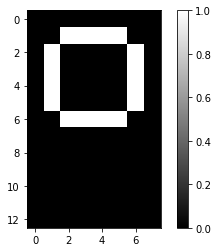

In [34]:
import matplotlib.pyplot as plt
import numpy as np
samples = np.array(pd.read_csv('lcd_nums.txt'))

# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [35]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

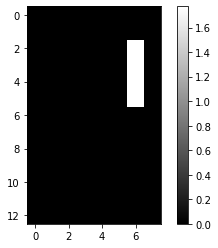

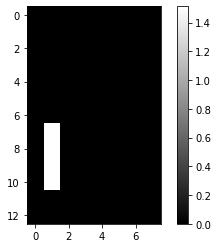

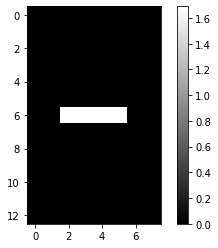

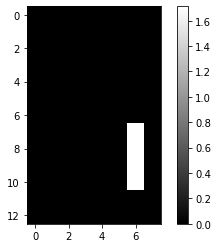

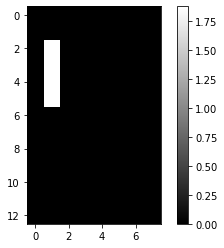

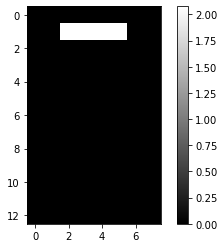

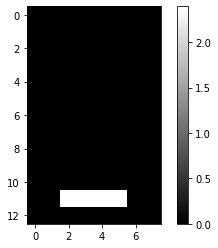

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


In [36]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

### Finding similar articles
- recommend similar articles to the one being read by the user
- articles should have similar topics

#### Strategy
- apply NMF to word-frequency array
- NMF Feature values describe the topics
- ...so simliar articles have similar NMF feature values
- different versions of the same document have the same topic proportions
- ...exact feature values may be different
- one article may have meaningless "fill" words that affect the frequency of topic words
- but all versions lie on the same line through the origin
- <b>Cosine Similarity</b>: uses the angle between lines (higher values indicate greater similarity)
- 

In [37]:
# wikipedia data taken from DataCamp. 60 rows (articles) and 13k+ columns (words)
wiki = pd.read_csv('wikipedia.csv') 
titles = wiki.titles # extract titles from first column
wiki = wiki.drop('titles', axis=1) # Drop Titles from data frame

# Create a csr_matrix object of the articles from wiki
from scipy.sparse import csr_matrix
articles = csr_matrix(wiki)

# Import NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)

# Calculating the Cosine Similarities
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)

# Assuming article has index 23
current_article = norm_features[23,:]
similarities = norm_features.dot(current_article)
print(similarities)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.92570268e-02 0.00000000e+00 0.00000000e+00
 4.91256374e-02 1.88634992e-01 0.00000000e+00 0.00000000e+00
 1.90961344e-01 3.23162959e-02 0.00000000e+00 0.00000000e+00
 8.59390854e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.92370291e-01 1.00000000e+00 9.99911928e-01 1.00000000e+00
 1.00000000e+00 9.45496108e-01 9.99922073e-01 9.99048941e-01
 9.99977500e-01 9.99327084e-01 0.00000000e+00 1.02688068e-02
 7.02796595e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.08248992e-01 5.19633277e-02 3.66187732e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.04122145e-02
 1.08380346e-03 0.00000000e+00 0.00000000e+00 9.97892141e-04
 3.12030731e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.24968441e-02 9.85024175e-02 0.00000000e+00 0.00000000e+00
 1.88271748e-01 0.00000000e+00 3.01769674e-02 2.51664324e-01]


### Creating an article recommender

In [43]:
# Imports
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from scipy.sparse import csr_matrix

# wikipedia data taken from DataCamp. 60 rows (articles) and 13k+ columns (words)
wiki = pd.read_csv('wikipedia.csv') 
titles = wiki.titles # extract titles from first column
wiki = wiki.drop('titles', axis=1) # Drop Titles from data frame

# Create a csr_matrix object of the articles from wiki
articles = csr_matrix(wiki)

# Create an NMF model and create the components and feature values
nmf = NMF(n_components=6)
nmf_features = nmf.fit_transform(articles)

# Normalize the feature values and create a dataframe using the titles as an index
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)

# Assign the current article title to variable
current_article = df.loc['Cristiano Ronaldo']

# Calculate the Cosine Similarities
similarities = df.dot(current_article)

# Print the 5 most similar articles
print(similarities.nlargest())

titles
Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64
